In [1]:
import geopandas as gpd
from shapely.geometry import Point, MultiPoint, Polygon
import numpy as np

In [2]:
list_1 = [[184706907, 576535759, 41029],
 [184706892, 576535770, 41006],
 [184707037, 576535996, 40855],
 [184706797, 576535831, 40873],
 [184707018, 576536009, 40831],
 [184706693, 576535903, 40712],
 [184706594, 576535968, 40405],
 [184706597, 576535963, 40448],
 [184706580, 576535969, 40461],
 [184706591, 576535979, 40455],
 [184706718, 576536183, 40423],
 [184706711, 576536175, 40438],
 [184706509, 576536019, 40451],
 [184706497, 576536033, 40446],
 [184706482, 576536034, 40370]]


In [3]:
mp = MultiPoint(list_1)

In [4]:
c = mp.centroid
print(c)

POINT (184706708.2 576535972.7333333)


In [5]:
b = c.buffer(250)

In [6]:
cut = mp.intersection(b)

In [7]:
poly = cut.convex_hull
poly_buf = poly.buffer(100)
poly_c = poly_buf.centroid

In [8]:
rect = cut.minimum_rotated_rectangle
rect_c = rect.centroid

<AxesSubplot:>

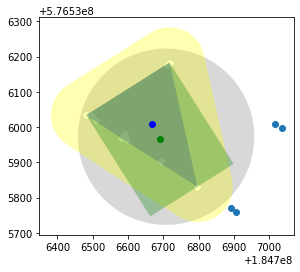

In [9]:
ax = gpd.GeoSeries(mp).plot()
gpd.GeoSeries(b).plot(ax=ax, color='grey', alpha=0.3)

gpd.GeoSeries(cut).plot(ax=ax, color='white')
gpd.GeoSeries(poly).plot(ax=ax, color='blue', alpha=0.3)
gpd.GeoSeries(poly_buf).plot(ax=ax, color='yellow', alpha=0.3)
gpd.GeoSeries(rect).plot(ax=ax, color='green', alpha=0.3)
gpd.GeoSeries(rect_c).plot(ax=ax, color='green')
gpd.GeoSeries(poly_c).plot(ax=ax, color='blue')

In [10]:
z_m = np.mean(mp, axis=0)[2] 

In [11]:
np.max(mp, axis=0)[2], np.min(mp, axis=0)[2]

(41029.0, 40370.0)

In [12]:
mp_z = []
for i in range(len(mp)):
    if mp[i].z > z_m:
        mp_z.append(mp[i])
mp_z = MultiPoint(mp_z)

In [13]:
print(mp_z[1])

POINT Z (184706892 576535770 41006)


In [17]:
# x-y bounding box is a (minx, miny, maxx, maxy) tuple
bo = mp.bounds
bo_xmin = bo[0]
bo_xmax = bo[2]
bo_ymin = bo[1]
bo_ymax = bo[3]

In [35]:
print(bo_xmin,
bo_xmax,
bo_ymin,
bo_ymax)

184706482.0 576535759.0 184707037.0 576536183.0


In [45]:
def ifinbounds(x, y, bounds):
    if bounds[2] >= x >= bounds[0] and bounds[3] >= y >= bounds[1]:
        return True
    else: 
        return False

In [55]:
test_x, test_y = 184706690, 576535964
ifinbounds(test_x, test_y, bo)

True